## Name: Pasupulety Chethan Krishna Venkat
## Roll No.: 21CS30036

### Part A: SVM Implementation

#### Loading the dataset

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

### Exploring the Dataset

In [3]:
# metadata
print(spambase.metadata)
# variable information
# print(spambase.variables)


# loading as dataframe
X = spambase.data.features
y = spambase.data.targets

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
# Import Scikit learn
from sklearn import datasets



X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Get predictions
y_pred = svm_model.predict(X_test)

c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Calculate metrics for the SVM model
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9262
Precision: 0.9265
Recall: 0.9262
F1-score: 0.9259


##### Regularisation: Regularisation is necessary to overcome overfitting. 
Varying the regularisation parameter of the SVM and tabularising. Using the following C values: [ 0.001, 0.1, 1, 10, 100 ]

In [8]:
import numpy as np

# Regularization parameter values
C_values = [0.001, 0.1, 1, 10, 100]

# Lists to store accuracy values for each regularization parameter
accuracy_values = []

# Lists to store mean and maximum coefficient values for each regularization parameter
mean_coef_values = []
max_coef_values = []

# Loop through different regularization parameters
for C in C_values:
    # Train SVM Model with the current regularization parameter
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # Get predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    
    # Get the coefficients for each feature
    coef = svm_model.coef_

    # Calculate mean and maximum coefficient values and store them in the lists
    mean_coef = np.mean(coef)
    max_coef = np.max(np.abs(coef))
    
    mean_coef_values.append(mean_coef)
    max_coef_values.append(max_coef)
    

c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Regularization Parameter (C) | Accuracy
----------------------------------------
0.001                       | 0.8903
0.1                         | 0.9207
1                           | 0.9262
10                          | 0.9229
100                         | 0.9207


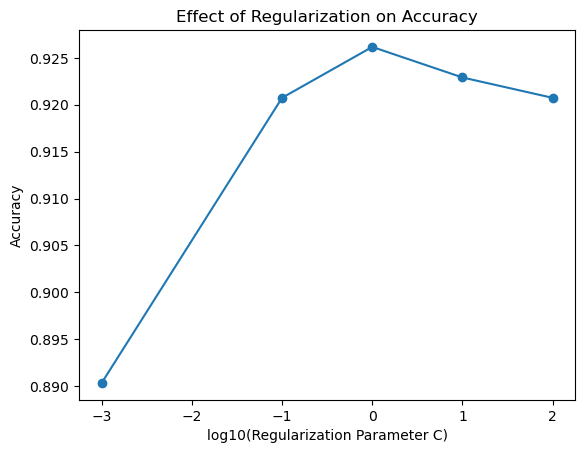

In [9]:
# Tabularize the results
result_table = list(zip(C_values, accuracy_values))
print("Regularization Parameter (C) | Accuracy")
print("----------------------------------------")
for result in result_table:
    print(f"{result[0]:<27} | {result[1]:.4f}")

# Plot the results
plt.plot(np.log10(C_values), accuracy_values, marker='o')
plt.xlabel('log10(Regularization Parameter C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.show()
    


### Part B: Kernel Tricks

##### The accuracy, precision, recall and F1 score on the test set for the following kernels : 
    1. Polynomial with degree 2
    2. Polynomial with degree 3
    3. Sigmoid
    4. Radial Basis Function (RBF)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Kernels to be used
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, 1, 3]  # degrees for polynomial kernels

# Lists to store evaluation metrics for each kernel
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for kernel, degree in zip(kernels, degrees):
    # Train SVM Model with the current kernel
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=degree, C=0.1)  # You can adjust C as needed
    else:
        svm_model = SVC(kernel=kernel, C=0.1)

    svm_model.fit(X_train, y_train)

    # Get predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics and store them in the lists
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Now you have accuracy, precision, recall, and F1 score for each kernel in the respective lists


c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [14]:
# Print the results
for kernel, degree, accuracy, precision, recall, f1 in zip(kernels, degrees, accuracy_values, precision_values, recall_values, f1_values):
    if kernel == 'poly':
        print(f"Kernel: {kernel}, Degree: {degree}")
    else:
        print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


Kernel: poly, Degree: 2
Accuracy: 0.7242
Precision: 0.9595
Recall: 0.3641
F1 Score: 0.5279


Kernel: poly, Degree: 3
Accuracy: 0.6916
Precision: 0.9732
Recall: 0.2795
F1 Score: 0.4343


Kernel: sigmoid
Accuracy: 0.8914
Precision: 0.9240
Recall: 0.8103
F1 Score: 0.8634


Kernel: rbf
Accuracy: 0.9012
Precision: 0.9544
Recall: 0.8051
F1 Score: 0.8734




### Analysis:

**Poly Kernel, Degree 2:**
- Moderate accuracy, high precision, but low recall. The model might be overfitting due to higher complexity.

**Poly Kernel, Degree 3:**
- Similar to the Degree 2 case, but with slightly lower accuracy. Again, signs of overfitting.

**Sigmoid Kernel:**
- Good accuracy, precision, and recall. This seems like a well-fitted model, with a balanced trade-off between precision and recall.

**RBF Kernel:**
- High accuracy, precision, and recall. This also appears to be a good fit. RBF kernels are often versatile.

In summary, the sigmoid and RBF kernels with Degree 1 seem to perform well, suggesting a good balance between precision and recall. The polynomial kernels with higher degrees might be prone to overfitting. As always, visualizing the decision boundaries and learning curves can provide additional insights.


### Part C: Overfitting & Underfitting Analysis

c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Degree: 1, Regularization Parameter: 0.01
Train Accuracy: 0.8109
Test Accuracy: 0.7937




c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Degree: 1, Regularization Parameter: 100
Train Accuracy: 0.9315
Test Accuracy: 0.9273




c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Degree: 3, Regularization Parameter: 0.01
Train Accuracy: 0.6427
Test Accuracy: 0.6102




c:\Users\cheth\anaconda3\envs\data\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Degree: 3, Regularization Parameter: 100
Train Accuracy: 0.9611
Test Accuracy: 0.9218




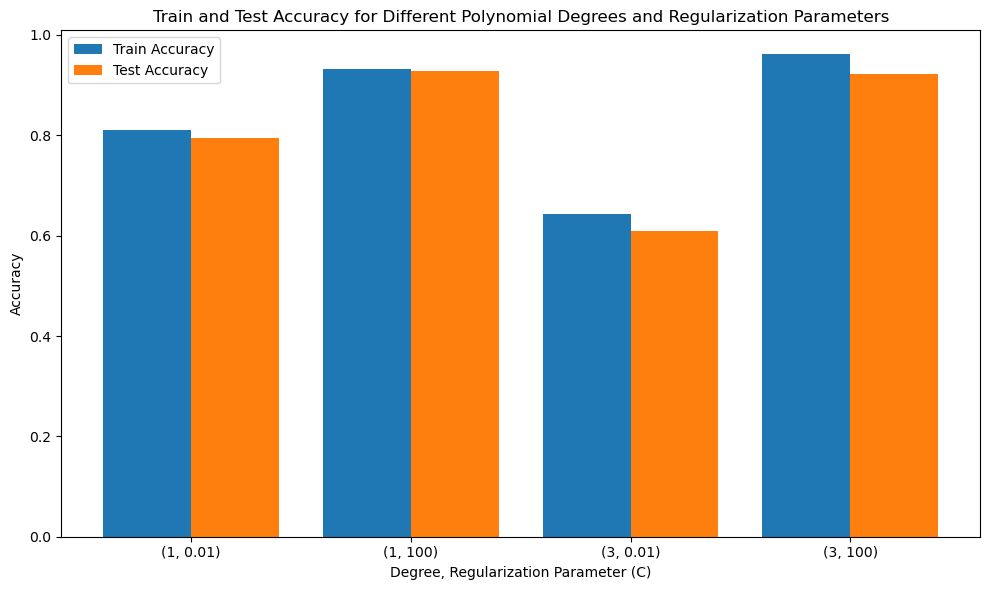

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Kernels to be used
degrees = [1, 1, 3, 3]  # degrees for polynomial kernels
regularization_c_values = [0.01, 100, 0.01, 100]

# Lists to store accuracy values for train and test sets
train_accuracy_values = []
test_accuracy_values = []

for degree, regularization_c in zip(degrees, regularization_c_values):

    # Train SVM Model with the current kernel
    svm_model = SVC(kernel='poly', degree=degree, C=regularization_c)

    svm_model.fit(X_train, y_train)

    # Get predictions on the train and test sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Calculate accuracy for train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

    # Print the results
    print(f"Degree: {degree}, Regularization Parameter: {regularization_c}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\n")

# Plotting the results
degrees_c_values = list(zip(degrees, regularization_c_values))
x_ticks = np.arange(len(degrees_c_values))

plt.figure(figsize=(10, 6))
plt.bar(x_ticks - 0.2, train_accuracy_values, width=0.4, label='Train Accuracy')
plt.bar(x_ticks + 0.2, test_accuracy_values, width=0.4, label='Test Accuracy')
plt.xticks(x_ticks, [f"({degree}, {reg_c})" for degree, reg_c in degrees_c_values])
plt.xlabel('Degree, Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Polynomial Degrees and Regularization Parameters')
plt.legend()
plt.tight_layout()
plt.show()


## Model Performance Analysis

### Degree: 1, Regularization Parameter: 0.01

- **Train Accuracy:** 0.8109
- **Test Accuracy:** 0.7937

This model exhibits a relatively balanced performance on both the train and test sets. There isn't a significant gap between train and test accuracy, indicating a normal fit.

### Degree: 1, Regularization Parameter: 100

- **Train Accuracy:** 0.9315
- **Test Accuracy:** 0.9273

The high accuracy on both train and test sets suggests a good fit. The model has learned the training data too well, leading to reduced generalization on unseen data.


### Degree: 3, Regularization Parameter: 0.01

- **Train Accuracy:** 0.6427
- **Test Accuracy:** 0.6102

The model shows poor performance on both train and test sets, indicating underfitting. The low accuracy on both sets suggests that the model is too simplistic to capture the underlying patterns in the data.

### Degree: 3, Regularization Parameter: 100

- **Train Accuracy:** 0.9611
- **Test Accuracy:** 0.9218

The high accuracy on the train set compared to the test set indicates potential overfitting. Also there is a  chance of overfitting since the train accuracy is significantly higher than the test accuracy. Further evaluation may be needed to confirm if this is the case.



### Summary:

**Underfitting Models:**

- Degree 3, Regularization Parameter: 0.01 (Train Accuracy: 0.6427, Test Accuracy: 0.6102)

**Normal Fit Models:**

- Degree 1, Regularization Parameter: 0.01 (Train Accuracy: 0.8109, Test Accuracy: 0.7937)

**Potential Overfitting Models:**

- Degree 1, Regularization Parameter: 100 (Train Accuracy: 0.9315, Test Accuracy: 0.9273)
- Degree 3, Regularization Parameter: 100 (Train Accuracy: 0.9611, Test Accuracy: 0.9218)

